<a href="https://colab.research.google.com/github/alvroble/NetConfigLens/blob/main/NCL_GPT2_Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initial imports and variables assignment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
path_files ='/content/drive/MyDrive/Colab Notebooks/NetConfigLens'
path_model='/content/drive/MyDrive/Colab Notebooks/NetConfigLens/NCL_GPT2_Pretrained'

In [ ]:
!pip install -U -q accelerate
!pip install -U -q transformers
!pip install -q tokenizer
!pip install -q gensim
!pip install -q datasets
!pip install -q evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from transformers import GPT2Tokenizer, GPT2Config, TFGPT2LMHeadModel, GPT2LMHeadModel
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments, TrainerCallback
from transformers import WEIGHTS_NAME, CONFIG_NAME
from pathlib import Path
import os
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import matplotlib.pyplot as plt

import pandas as pd
import random
import torch
import numpy as np

#Data preprocessing

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

In [ ]:
!cat /content/drive/MyDrive/Colab\ Notebooks/NetConfigLens/train_configs/* > merged-file_train.txt
!cat /content/drive/MyDrive/Colab\ Notebooks/NetConfigLens/val_configs/* > merged-file_eval.txt

In [ ]:
train_dataset = TextDataset(
  tokenizer=tokenizer,
  file_path="./merged-file_train.txt",
  block_size=128)

eval_dataset = TextDataset(
  tokenizer=tokenizer,
  file_path="./merged-file_eval.txt",
  block_size=128)

data_collator = DataCollatorForLanguageModeling(
  tokenizer=tokenizer, mlm=False)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


#Model loading and fine-tuning

In [ ]:
model = GPT2LMHeadModel.from_pretrained("gpt2")

In [ ]:
training_args = TrainingArguments(
    "test-trainer",
    evaluation_strategy="epoch",
    num_train_epochs=10,
    learning_rate=3e-5,
    logging_steps = 50
    )

trainer = Trainer(
    model,
    training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.389000,0.157242
2,0.160200,0.108429
3,0.121700,0.096123
4,0.109000,0.091705
5,0.100500,0.087083
6,0.094700,0.085142
7,0.089000,0.084218
8,0.087800,0.082485
9,0.084100,0.082029
10,0.082600,0.081689


Checkpoint destination directory test-trainer/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.


TrainOutput(global_step=1700, training_loss=0.20639958830440747, metrics={'train_runtime': 555.7974, 'train_samples_per_second': 24.343, 'train_steps_per_second': 3.059, 'total_flos': 883820298240000.0, 'train_loss': 0.20639958830440747, 'epoch': 10.0})

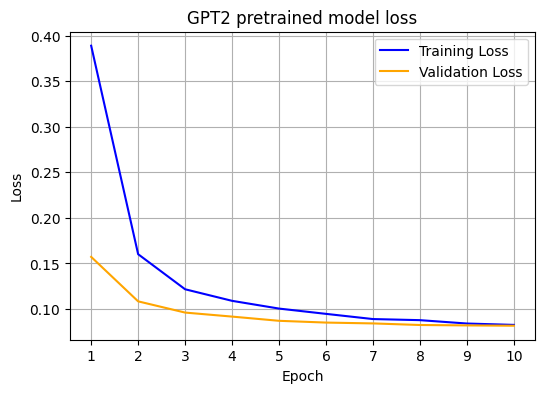

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Creating the plot
plt.figure(figsize=(6, 4))
xval = np.arange(1,11)
y_loss = [0.389, 0.1602, 0.1217, 0.109, 0.1005, 0.0947, 0.089,0.0878,0.0841,0.0826]
y_val_loss = [0.157242, 0.108429,0.096123, 0.091705, 0.087083, 0.085142,0.084218,0.082485,0.082029,0.081689]

# Plotting the first set of values
plt.plot(xval,y_loss, label='Training Loss', color='blue')

# Plotting the second set of values
plt.plot(xval,y_val_loss, label='Validation Loss', color='orange')

plt.xticks(xval)

# Adding title and labels
plt.title('GPT2 pretrained model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Adding a legend
plt.legend()

plt.grid(True)

# Show the plot
plt.show()

Model saving

In [ ]:
# Save the fine-tuned model
model.save_pretrained(path_model)
tokenizer.save_pretrained(path_model)

('/content/drive/MyDrive/Colab Notebooks/NetConfigLens/NCL_GPT2_Pretrained/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/NetConfigLens/NCL_GPT2_Pretrained/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/NetConfigLens/NCL_GPT2_Pretrained/vocab.json',
 '/content/drive/MyDrive/Colab Notebooks/NetConfigLens/NCL_GPT2_Pretrained/merges.txt',
 '/content/drive/MyDrive/Colab Notebooks/NetConfigLens/NCL_GPT2_Pretrained/added_tokens.json')

#Prediction and testing

In [ ]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

First, fine-tuned model and tokenizer are loaded

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained(path_model)
model = GPT2LMHeadModel.from_pretrained(path_model)

In [ ]:
model = model.to(DEVICE)

Auxiliar function for text analysis are created

In [ ]:
configuration_start_point = '!'
def find_config_start(config_lines, start_sequence):
  i=0
  config_found = np.False_
  while not config_found:
    if start_sequence in config_lines[i]:
      config_found = True
      config_index = i+1
    else:
      i+=1
  return config_index

In [ ]:
def get_config_lines(config_file):
  file_handle = open(config_file, 'r')
  config_lines = file_handle.readlines()
  config_index = find_config_start(config_lines,configuration_start_point)
  return config_lines[config_index:]


In [ ]:
import re

def get_corpus(config_file):
  file_handle = open(config_file, 'r')
  config_lines = file_handle.read()
  #config_lines = config_lines.replace('\n', ' ')
  #config_lines = re.sub('  +', ' ', config_lines)
  return config_lines.split(' ')


In [ ]:
def build_corpus_words(train_configs,path):
  for config_file in train_configs:
    corpus = []
    print('Config:',config_file)
    config_lines = get_config_lines(join(path,config_file))
    for i in range(len(config_lines)):
      corpus += config_lines[i].split(" ")
    return corpus

This *generate_next_word* function leverages the generation method of the model for extracting only the next word that the model is expecting after the prompt.

In [ ]:
def generate_next_word(input, model):
  if isinstance(input,list):
    text = "  ".join(input)
    input_len = len(input)
  else:
    text=input
    input_len = len(input.split(" "))
  input_ids = tokenizer.encode(text, return_tensors='pt')
  #print(input_ids)
  outputs = model.generate(input_ids=input_ids.to(DEVICE), max_new_tokens=30, pad_token_id=tokenizer.eos_token_id, do_sample=True, top_k=1, top_p=0.99, num_return_sequences=1)
  #print(f"INPUT: {text}")
  #print(f"OUTPUT: {tokenizer.decode(outputs[0], skip_special_tokens=True)}")
  n=0
  for item in tokenizer.decode(outputs[0], skip_special_tokens=True):
    if item == '\n':
      n+=1
  #print(f"Hay {n} saltos de linea")
  return tokenizer.decode(outputs[0], skip_special_tokens=True).replace("  "," ").split(" ")[input_len]

In [ ]:
config_file = 'config_PE-100_WithErrors.cfg'
words = get_corpus(join(path_files,config_file))
config_file_loc = 'config_PE-100_WithErrors_Loc.cfg'
words_loc = get_corpus(join(path_files,config_file_loc))

def config_anomaly_detection(context):
  tp = 0
  fp = 0
  colored_config = ''
  fails = 0
  for i in tqdm(range(len(words)-context)):
    if i>=context:
      next_word = generate_next_word(words[i-context:i],model)
      if next_word in words[i]:
        if("<err>") in words_loc[i]:
          colored_config += '\033[96m '+ words[i] + '(expected: '+next_word+')'
        else:
          colored_config += '\033[92m '+ words[i]
      else:
        if("<err>") in words_loc[i]:
          colored_config += '\033[91m '+ words[i] + '(expected: '+next_word+')'
          #print(f"Error Predicted!: {repr(next_word)} and Actual: {repr(words[i])}")
          tp+=1
        else:
          colored_config += '\033[95m '+ words[i] + '(expected: '+next_word+')'
          #print(f"False positive: {repr(next_word)} and Actual: {repr(words[i])}")
          fp+=1
    else:
        colored_config += '\033[94m '+ words[i]
  print(tp,fp)
  return tp, fp, colored_config

#Test 1. Test for different context lengths

In [ ]:
context_list = [10,20,30,40,50,60,70,80,90,100]
fp_list = []
tp_list = []

for context in context_list:
  tp,fp,colored_config = config_anomaly_detection(context)
  tp_list.append(tp)
  fp_list.append(fp)

100%|██████████| 594/594 [04:09<00:00,  2.38it/s]


65 25


100%|██████████| 584/584 [03:39<00:00,  2.66it/s]


63 18


100%|██████████| 574/574 [03:33<00:00,  2.69it/s]


61 16


100%|██████████| 564/564 [03:28<00:00,  2.71it/s]


61 21


100%|██████████| 554/554 [03:21<00:00,  2.75it/s]


58 27


100%|██████████| 544/544 [03:14<00:00,  2.79it/s]


56 30


100%|██████████| 534/534 [03:06<00:00,  2.86it/s]


55 27


100%|██████████| 524/524 [03:01<00:00,  2.89it/s]


52 25


100%|██████████| 514/514 [02:54<00:00,  2.94it/s]


52 25


100%|██████████| 504/504 [02:47<00:00,  3.02it/s]

49 24


In [ ]:
print(tp_list)
print(fp_list)
#tw=604

[65, 63, 61, 61, 58, 56, 55, 52, 52, 49]
[25, 18, 16, 21, 27, 30, 27, 25, 25, 24]


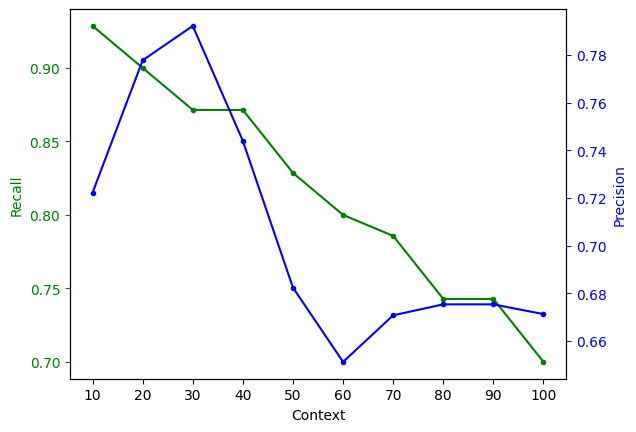

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = context_list
y1 = tp_list
y2 = fp_list
total_positives = 70

fn_list = np.repeat(total_positives,len(x))-np.array(tp_list)
recall = np.divide(tp_list, tp_list+fn_list)
precision = np.array(tp_list)/(np.array(tp_list)+np.array(fp_list))
f1-score

# Create two subplots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Creates a second y-axis on the right

# Plot on the first subplot
ax1.plot(x, recall, 'g.-')
ax1.set_xlabel('Context')
ax1.set_ylabel('Recall', color='g')
ax1.tick_params('y', colors='g')
ax1.set_xticks(x)

# Plot on the second subplot
ax2.plot(x, precision, 'b.-')
ax2.set_ylabel('Precision', color='b')
ax2.tick_params('y', colors='b')

# Show the plot
plt.show()


The best result is achieved at 20 words of context

In [ ]:
context = 20
tp,fp,colored_config = config_anomaly_detection(context)

100%|██████████| 584/584 [03:46<00:00,  2.58it/s]

63 18


With the config_anomaly_detection function, errors can be found and the text can be reconstructed. Color code:

$\color{red}{\text{True positives}}$

$\color{magenta}{\text{False positives}}$

$\color{#00FFFF}{\text{False negatives}}$

$\color{#4D3AFF}{\text{Initial text, not applicable}}$

In [ ]:
print(colored_config)

 !Image: Software version: IOS-XR 7.6R3
!Image: Copyright (C) 2020 your favorite vendor. All rights reserved
!Image: Software Product: IOS-XR, Version: 7.6R3
!Image: Hardware Model: ASR
!Image: Software Feature Code: SP
!Image: System Configuration Code: S5
!Image:(expected: S3
!Image:) Package Configuration Code: P4
!Image:(expected: P6
!Image:) Software Baseline Version: 2.3.5
!Image: Installation Information:
!Image: Image Filename: IOS-XR-7-6-R-3
!Image: ONIE SysInfo: x86_64-accton_asr7736_64x-r0
!
!
!
!
!
!
! Software version: IOS-XR 7.11.1
!
!
logging(expected: 7.6R3
!
!
logging) level cml 4
!
service(expected: 5
!
service) password-encryption
!
disable(expected: password-encryption
!
enable) confirmation-dialog
!
no logging monitor
no(expected: console
no) logging monitor
logging level nsm 5 
logging level rip 5 
logging level ripng 5 
logging level ospf 4(expected: 5) 
logging level ospf6 4(expected: 5) 
logging level isis 5 
logging level hostp 5 
logging level mrib 5 
logging

#Test 2. Confusion matrix for the best performance

For the best performance

Accuracy:	 0.9702
Precision:	 0.7778
Recall:	 0.9000
F1 score:	 0.8344
False positives rate:	 0.0333
False negatives rate:	 0.1000


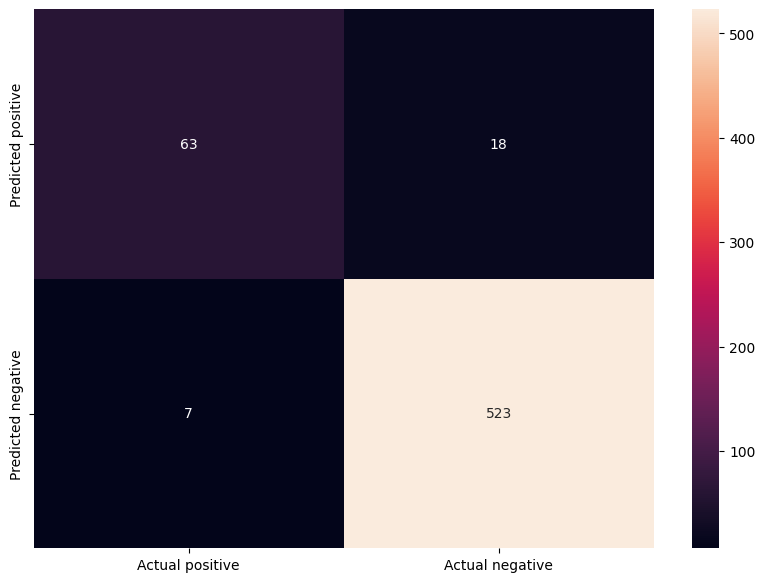

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
tp = 63
fp = 18
total = 604
p = 70
tn = total-tp-fp
fn = p-tp
n = total-p

array = [[tp,fp],
        [fn,tn]]
df_cm = pd.DataFrame(array, index = [i for i in ["Predicted positive","Predicted negative"]],
                  columns = ["Actual positive","Actual negative"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='.0f')

# accuracy: (tp + tn) / (p + n)
accuracy = (tp+tn)/total
print('Accuracy:\t %.4f' % accuracy)
# precision tp / (tp + fp)
precision = tp / (tp+fp)
print('Precision:\t %.4f' % precision)
# recall: tp / (tp + fn)
recall = tp / (tp+fn)
print('Recall:\t %.4f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = 2*tp / (2*tp + fp + fn)
print('F1 score:\t %.4f' % f1)
# fpr: 2 tp / (2 tp + fp + fn)
fpr = fp / (tn+fp)
print('False positives rate:\t %.4f' % fpr)
# fnr: 2 tp / (2 tp + fp + fn)
fnr = fn / (tp+fn)
print('False negatives rate:\t %.4f' % fnr)